<a href="https://colab.research.google.com/github/alheir/dip-2024-g4/blob/main/DIP_TP7-G4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP7 Procesamiento de Imágenes - Grupo 4

**MORFOLOGÍA**

Heir, Alejandro Nahuel (62496)

Mendizabal, Francisco (61454)

Sbruzzi, Juan Francisco (62517)

Vazquez, Agustin (61420)

# Paquetes y módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# https://medium.com/swlh/image-processing-with-python-morphological-operations-26b7006c0359
from skimage.morphology import (erosion, dilation, closing, opening, area_closing, area_opening)

from ipywidgets import interact, IntSlider

# Carga de archivos

In [2]:
files_fn = 'tp7-images.zip'
files_url = 'https://downloads.sourceforge.net/project/dsp-fpga-dip-nn-itba/dip/tp7-images.zip'

!wget {files_url} -O {files_fn}

!unzip -o {files_fn}

!rm {files_fn}

--2024-10-31 02:39:50--  https://downloads.sourceforge.net/project/dsp-fpga-dip-nn-itba/dip/tp7-images.zip
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Connecting to downloads.sourceforge.net (downloads.sourceforge.net)|204.68.111.105|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cytranet-dal.dl.sourceforge.net/project/dsp-fpga-dip-nn-itba/dip/tp7-images.zip?viasf=1 [following]
--2024-10-31 02:39:50--  https://cytranet-dal.dl.sourceforge.net/project/dsp-fpga-dip-nn-itba/dip/tp7-images.zip?viasf=1
Resolving cytranet-dal.dl.sourceforge.net (cytranet-dal.dl.sourceforge.net)... 162.226.127.129
Connecting to cytranet-dal.dl.sourceforge.net (cytranet-dal.dl.sourceforge.net)|162.226.127.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113569 (111K) [application/octet-stream]
Saving to: ‘tp7-images.zip’

tp7-images.zip      100%[===================>] 110.91K  --.-KB/s    in 0.07s   

2024

In [3]:
!ls -R -Isample_data

.:
 bird.png	   ej4pic.tif  'Lincoln from penny.tif'   wikiCosmo.png
 Broken_Text.tif   j.png        Noisy_Squares.tif


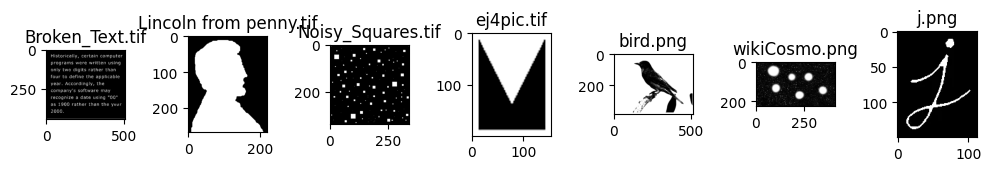

In [4]:
broken_text = cv2.imread('Broken_Text.tif', cv2.IMREAD_GRAYSCALE)
lincoln_penny = cv2.imread('Lincoln from penny.tif', cv2.IMREAD_GRAYSCALE)
noisy_squares = cv2.imread('Noisy_Squares.tif', cv2.IMREAD_GRAYSCALE)
ej4pic = cv2.imread('ej4pic.tif', cv2.IMREAD_GRAYSCALE)
bird = cv2.imread('bird.png', cv2.IMREAD_GRAYSCALE)
wikiCosmo = cv2.imread('wikiCosmo.png', cv2.IMREAD_GRAYSCALE)
j = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(171)
plt.imshow(broken_text, cmap='gray')
plt.title('Broken_Text.tif')

plt.subplot(172)
plt.imshow(lincoln_penny, cmap='gray')
plt.title('Lincoln from penny.tif')

plt.subplot(173)
plt.imshow(noisy_squares, cmap='gray')
plt.title('Noisy_Squares.tif')

plt.subplot(174)
plt.imshow(ej4pic, cmap='gray')
plt.title('ej4pic.tif')

plt.subplot(175)
plt.imshow(bird, cmap='gray')
plt.title('bird.png')

plt.subplot(176)
plt.imshow(wikiCosmo, cmap='gray')
plt.title('wikiCosmo.png')

plt.subplot(177)
plt.imshow(j, cmap='gray')
plt.title('j.png')

plt.tight_layout()

plt.show()

# 0 - Contexto

La morfología matemática es una rama del procesamiento de imágenes que se ocupa del análisis y la manipulación de las formas de los objetos en una imagen. Utiliza una imagen pequeña, llamada elemento estructural (SE), para explorar la imagen y modificar los valores de los píxeles en función de su relación con los píxeles vecinos en el SE. Las operaciones morfológicas son herramientas fundamentales para diversas tareas de procesamiento de imágenes, como pueden ser:
* Feature extraction: formas, contornos.
* Eliminación de ruido: remover objetos pequeños y aislados.
* Segmentación: identificar y seprar objetos individuales.

# 1 - Dilation

Aplicar la operación de dilación a `Broken_Text.tif`, siendo el elemento
estructural `B = [0 1 0; 1 1 1; 0 1 0];`

La dilación aumenta el tamaño de los objetos claros (foreground) en una imagen. Se realiza deslizando el SE sobre la imagen. En cada posición, el pixel de salida se establece en el valor máximo entre el pixel central del SE y los píxeles correspondientes de la imagen.

La dilación de un conjunto A por un SE B se define como:
$$A ⊕ B = {z | (B)_z ∩ A ≠ ∅}$$ donde:
* $A$ es el conjunto de píxeles de la imagen original
* $B$ es el SE
* $(B)_z$ es la traslación de $B$ por el vector $z$

*En términos más simples, la dilatación "engorda" los objetos en la imagen, agregando píxeles a los bordes.*

En el ejemplo, se aplica la dilatación a la imagen "Broken_Text.tif" utilizando un SE definido por la matriz B. La imagen resultante tendrá los **objetos claros (texto) ligeramente más gruesos**.

In [5]:
A = broken_text.copy()
B = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).astype(np.uint8) * 255

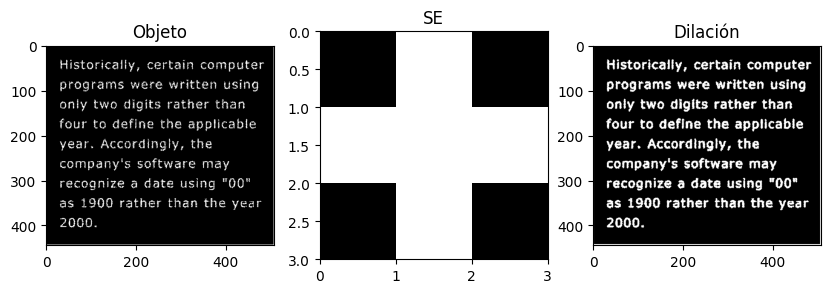

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(A, cmap='gray')
plt.title('Objeto')

plt.subplot(132)
plt.imshow(B, cmap='gray', extent=[0, B.shape[0], B.shape[1], 0])
plt.title('SE')

plt.subplot(133)
plt.imshow(dilation(A,B), cmap='gray')
plt.title('Dilación')

plt.show()

# 2 - Erosion

Reproducir el ejemplo con la imagen `Noisy_Squares.tif`:

a) (original) Imagen de cuadrados de tamaños 1 3 5 7 9 y 15 pixeles de lado

b) Erosión de a) con un elemento cuadrado de 13px de lado.

c) Dilatación de b) con el mismo elemento estructural

*Elemento estructural: B = 13x13px de 1s*

La erosión reduce el tamaño de los objetos claros (foreground) en una imagen. Se realiza de manera similar a la dilación, pero el pixel de salida se establece en el valor mínimo entre el pixel central del SE y los píxeles correspondientes de la imagen.

La erosión de un conjunto A por un SE B se define como:
$$A ⊖ B = {z | (B)_z ⊆ A}$$

*La erosión "adelgaza" los objetos en la imagen, eliminando píxeles de los bordes.*

En el ejemplo, se aplica la erosión a la imagen "Noisy_Squares.tif" utilizando un SE cuadrado de 13px de lado. La imagen resultante tendrá los cuadrados más pequeños, erosionados por los bordes, y eliminará los cuadradas más chicos que el SE.

## a) Original

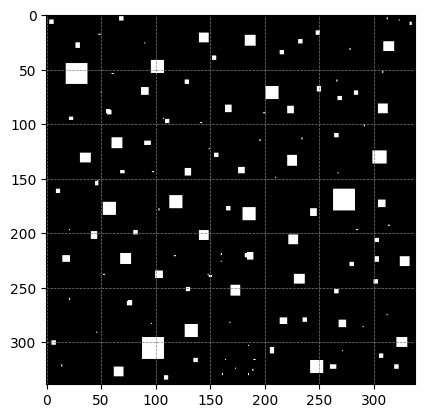

In [7]:
A = noisy_squares.copy()
plt.imshow(A, cmap='gray')
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.show()

## b) Erotion

Si el SE puede ser **completamente contenido** dentro de una región blanca de la imagen, entonces el píxel central del SE en la imagen resultante se marca como blanco. De lo contrario, se marca como negro.

* Objetos pequeños: los objetos más pequeños que el SE son completamente "devorados" por el SE durante el proceso, desapareciendo en la imagen resultante.
* Esquinas y bordes: las esquinas y bordes de los objetos más grandes también se erosionan, ya que el SE no puede ser completamente contenido en estas regiones.

In [8]:
B = np.ones((13, 13), dtype=np.uint8) * 255

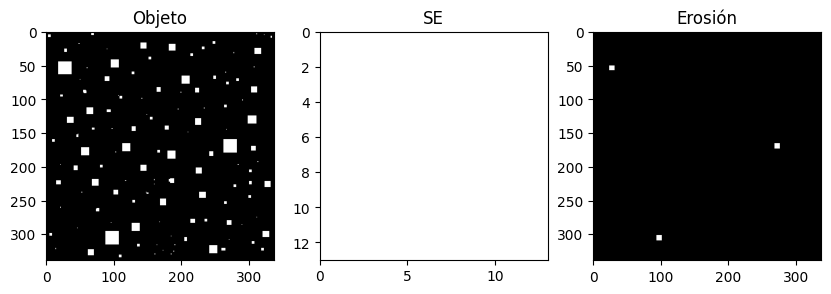

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(A, cmap='gray')
plt.title('Objeto')

plt.subplot(132)
plt.imshow(B, cmap='gray', vmin=0, vmax=1, extent=[0, B.shape[0], B.shape[1], 0])
plt.title('SE')

plt.subplot(133)
plt.imshow(erosion(A,B), cmap='gray')
plt.title('Erosión')

plt.show()

## c) Dilation

Al aplicar la dilación al resultado anterior, se engrosarán los cuadrados blancos resultantes. Al aplicarlos con el mismo SE, se restaura su tamaño original.

En este caso, podemos decir que:
* Eliminamos ruido, siendo ruido los cuadrados de menor tamaño
* Aislamos los cuadrados mayores a cierto tamaño

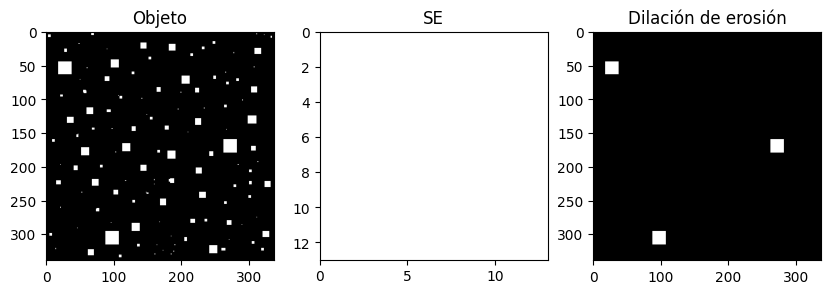

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(A, cmap='gray')
plt.title('Objeto')

plt.subplot(132)
plt.imshow(B, cmap='gray', vmin=0, vmax=1, extent=[0, B.shape[0], B.shape[1], 0])
plt.title('SE')

plt.subplot(133)
plt.imshow(dilation(erosion(A,B), B), cmap='gray')
plt.title('Dilación de erosión')

plt.show()

# 3 - Opening

Aplicar la operación de apertura a la figura (b) con el elemento estructural (a). El radio del elemento estructural debe ser variable de manera que el usuario pueda interactuar desde el programa.

![](https://i.imgur.com/c4Hq7Te.png)

La apertura es una operación compuesta que combina la erosión y la dilatación. Primero, se erosiona la imagen con un elemento estructurante. Luego, se dilata la imagen erosionada con el mismo elemento estructurante. La apertura se utiliza comúnmente para eliminar objetos pequeños (ruido) mientras preserva en mayor medida los bordes de los objetos grandes.

$$A ∘ B = (A ⊖ B) ⊕ B$$

En el ejemplo, se aplica la apertura a la imagen "ej4pic.tif" con un SE circular cuyo radio se puede ajustar mediante el control deslizante interactivo. La imagen resultante tendrá menos ruido manteniendo las formas de los objetos principales.

In [11]:
def get_element(r, fill_zeros=False):
  size = 2 * r + 1
  element = np.ones((size, size), dtype=np.uint8) * (255 if fill_zeros else 0)
  cv2.circle(element, (r, r), r, (255 if not fill_zeros else 0), -1)
  return element

In [26]:
@interact(r=IntSlider(min=1, max=50, step=1, value=19))
def update_opening1(r):
  A  = ej4pic.copy()
  B = get_element(r, fill_zeros=True)
  opened_image = dilation(erosion(A, B), B)

  plt.figure(figsize=(8, 5))

  plt.subplot(131)
  plt.imshow(A, cmap='gray')
  plt.title('Objeto')

  plt.subplot(132)
  plt.imshow(B, cmap='gray', vmin=0, vmax=1, extent=[0, B.shape[0], B.shape[1], 0])
  plt.title(f'SE,  r={r}')

  plt.subplot(133)
  plt.imshow(opened_image, cmap='gray')
  plt.title(f'Apertura, r={r}')

  plt.show()

interactive(children=(IntSlider(value=19, description='r', max=50, min=1), Output()), _dom_classes=('widget-in…

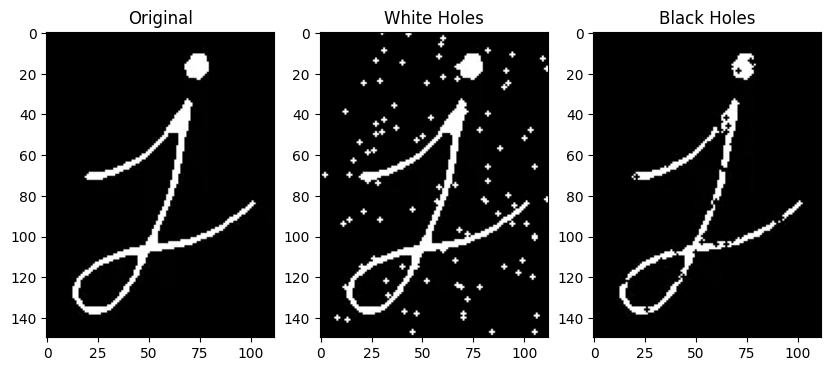

In [13]:
# white holes
j_white_holes = j.copy()
for i in range(100):  # Number of holes
    x = np.random.randint(0, j.shape[1])
    y = np.random.randint(0, j.shape[0])
    size = np.random.randint(1, 2)
    cv2.circle(j_white_holes, (x, y), size, 255, -1)

# black holes
j_black_holes = j.copy()
for i in range(500):  # Number of holes
    x = np.random.randint(0, j.shape[1])
    y = np.random.randint(0, j.shape[0])
    size = np.random.randint(1, 2)
    cv2.circle(j_black_holes, (x, y), size, 0, -1)

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(j, cmap='gray')
plt.title('Original')
plt.subplot(132)
plt.imshow(j_white_holes, cmap='gray')
plt.title('White Holes')
plt.subplot(133)
plt.imshow(j_black_holes, cmap='gray')
plt.title('Black Holes')
plt.show()

In [27]:
@interact(r=IntSlider(min=1, max=10, step=1, value=2))
def update_opening2(r):
  A = j_white_holes.copy()
  # B = get_element(r, fill_zeros=False)
  B = np.ones((r,r), dtype=np.uint8) * 255
  opened_image = dilation(erosion(A, B), B)

  plt.figure(figsize=(8, 5))

  plt.subplot(131)
  plt.imshow(A, cmap='gray')
  plt.title('Objeto')

  plt.subplot(132)
  plt.imshow(B, cmap='gray', vmin=0, vmax=1, extent=[0, B.shape[0], B.shape[1], 0])
  plt.title(f'SE,  r={r}')

  plt.subplot(133)
  plt.imshow(opened_image, cmap='gray')
  plt.title(f'Apertura, r={r}')

  plt.show()

interactive(children=(IntSlider(value=2, description='r', max=10, min=1), Output()), _dom_classes=('widget-int…

# 3bis - Closing

El cierre es la operación dual de la apertura:

$$A • B = (A ⊕ B) ⊖ B$$

El cierre rellena los agujeros pequeños en los objetos y suaviza los contornos internos.

In [15]:
@interact(r=IntSlider(min=1, max=10, step=1, value=5))
def update_closing(r):
  A = j_black_holes.copy()
  B = get_element(r)
  closed_image = erosion(dilation(A, B), B)

  plt.figure(figsize=(8, 5))

  plt.subplot(131)
  plt.imshow(A, cmap='gray')
  plt.title('Objeto')

  plt.subplot(132)
  plt.imshow(B, cmap='gray', vmin=0, vmax=1, extent=[0, B.shape[0], B.shape[1], 0])
  plt.title(f'SE,  r={r}')

  plt.subplot(133)
  plt.imshow(closed_image, cmap='gray')
  plt.title(f'Cierre, r={r}')

  plt.tight_layout()

  plt.show()

interactive(children=(IntSlider(value=5, description='r', max=10, min=1), Output()), _dom_classes=('widget-int…

# 4 - Boundary extraction

Extraer el contorno de la figura `Lincoln from penny.tif`

Referencia: 9.5 Some Basic Morphological Algorithms, Boundary Extraction, pp. 653

La extracción de contornos permite obtener los bordes de los objetos en una imagen. Se puede lograr mediante la resta de la imagen original y la imagen erosionada con un SE pequeño. Los píxeles que quedan en la imagen resultante corresponden al contorno del objeto.

La extracción de contornos se puede realizar mediante la diferencia entre la imagen original y su erosión:

$$Contorno(A, B) = A - (A ⊖ B)$$

In [16]:
def boundary(A, B):
  return A - erosion(A, B)

In [17]:
A = lincoln_penny.copy()
B = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]).astype(np.uint8) * 255

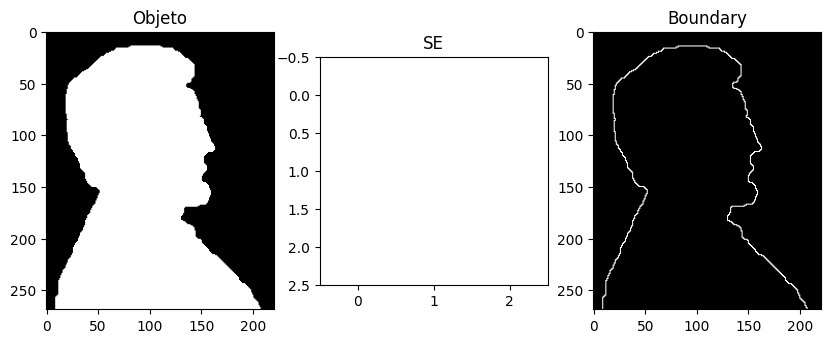

In [18]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(A, cmap='gray')
plt.title('Objeto')

plt.subplot(132)
plt.imshow(B, cmap='gray', vmin=0, vmax=1)
plt.title('SE')

plt.subplot(133)
plt.imshow(boundary(A,B), cmap='gray')
plt.title('Boundary')

plt.show()

# 5 - Research

Investigar qué es y dar ejemplos de:

a) Thinning

b) Thickening

c) Top-hat transform

d) Hit and miss


In [29]:
def hmt2(A, B1, B2):
  erosion_B1 = erosion(A, B1)
  erosion_B2_complement = erosion(255 - A, B2)

  result = np.bitwise_and(erosion_B1, erosion_B2_complement)
  return result

In [30]:
from PIL import Image, ImageOps
image = Image.open('bird.png').convert("L")
image_array = np.array(image)

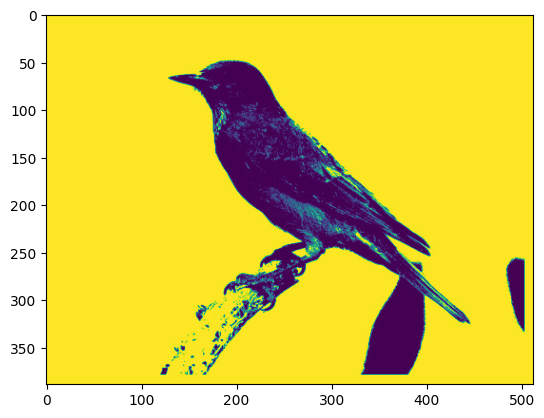

In [31]:
plt.imshow(image_array)
input_image = image_array

## a) Thinning [Fuente](https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm)

Es un algoritmo que tiene como fin disminuir el grosor de los trazos de una imagen **binaria**. Es importante notar que este algoritmo también produce una imagen binaria como salida.

Este algoritmo está fuertemente relacionado con el operador morfológico Hit and Miss, siendo determinante el elemento estructural para producir este efecto. Por lo que queda definido de la siguiente manera:

$$I_t(i,j) = I ~\&~ hit~and~miss(i,j) $$

Puede ser aplicado para diversos fines, pero uno de los más usados es para detección de bordes.

Finalmente, hacemos uso de la imagen del trabajo práctico anterior para mostrar el funcionamiento de dicho algoritmo.

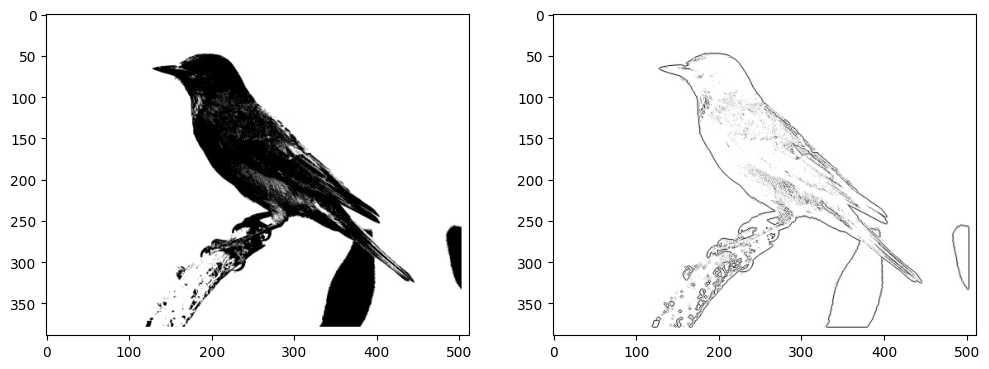

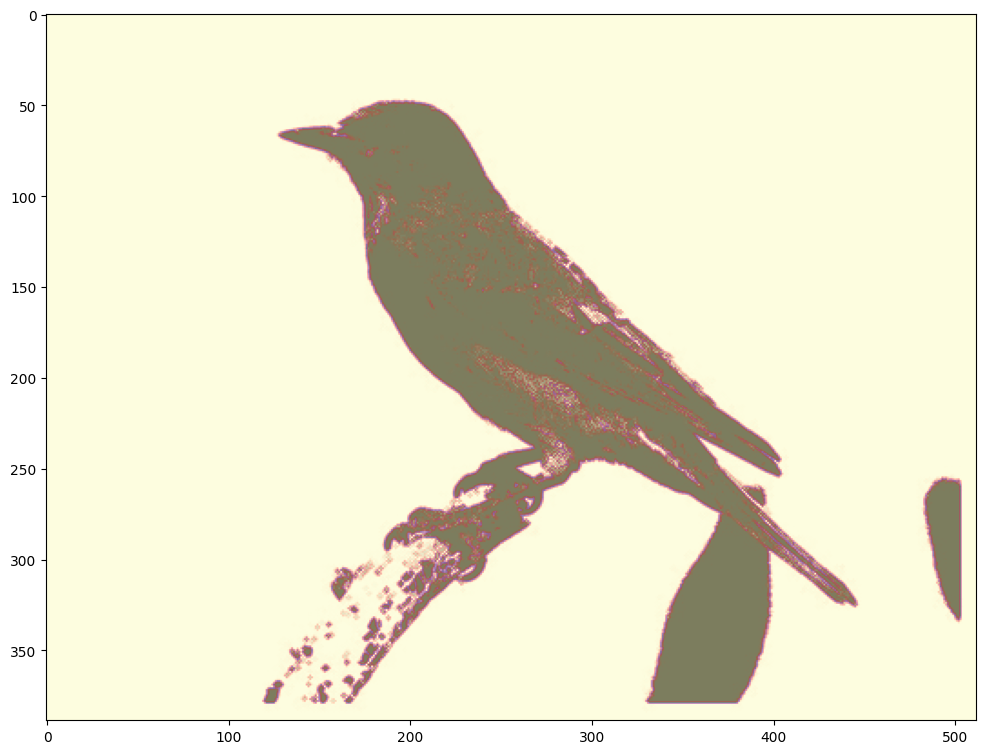

In [32]:
output_image = input_image.copy()
thin_image = input_image.copy()
kernel = np.array((
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]), dtype="int")

for i in range(400):
  output_image = cv2.morphologyEx(thin_image, cv2.MORPH_HITMISS, kernel)
  thin_image = thin_image & (255-output_image)

fig, ax = plt.subplots(1, 2, figsize=(12, 12))

ax[0].imshow(input_image, cmap="gray")
thin_image = 255-thin_image
ax[1].imshow(thin_image, cmap="gray")

plt.figure(figsize=(12, 12))
plt.imshow(input_image, cmap = "gray")
plt.imshow(thin_image, cmap = "magma",alpha =0.5)

plt.show()

## b) Thickening [Fuente](https://homepages.inf.ed.ac.uk/rbf/HIPR2/thick.htm)

Es un algoritmo que tiene como fin engrosar los trazos de la imagen sin perder la forma de la imagen. Como el algoritmo anterior, este se aplica sobre imágenes binarias siendo el output también de este estilo.

Por otra parte, este algoritmo morfológico también está relacionado con Hit and Miss, quedando esta relación definida de la siguiente manera.

$$I_t(i,j) = I ~|~ hit~and~miss(i,j) $$

Este algoritmo es complementario con el Thinning, dado que aplicar el Thickening en el fondo de la imagen es equivalente a aplicar Thinning al cuerpo de la imagen. Ergo, este algoritmo puede ser aplciado para los mismos fines que el anterior mencionado.

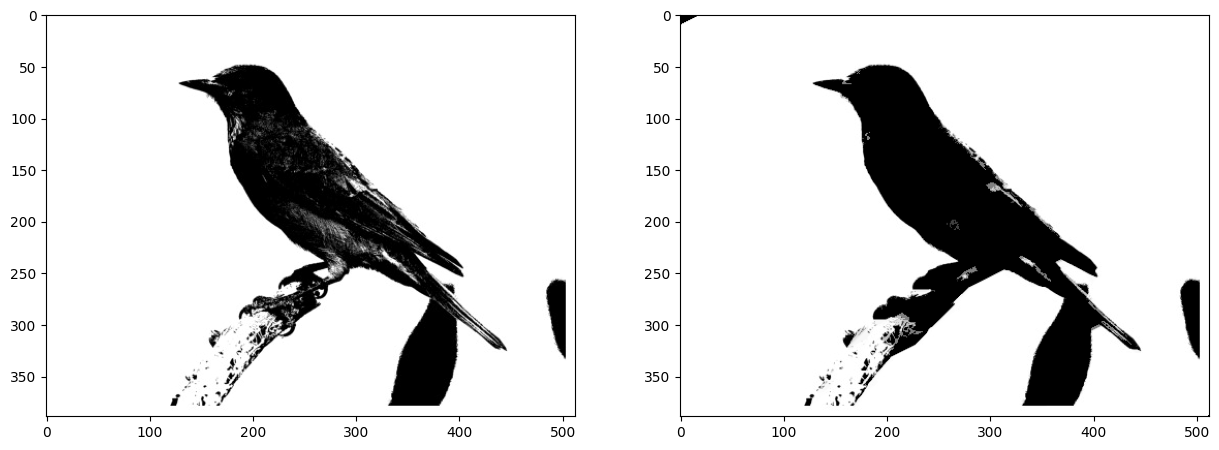

In [33]:
thick_image = 255 -  input_image.copy()
kernel = np.array((
        [1, 1, 1],
        [1, 0, 0],
        [0, 0, 0]), dtype="int8")

kernel2 = np.array((
        [0, 0, 1],
        [0, 0, 1],
        [1, 1, 1]), dtype="int8")

for i in range(20):
  output_image = cv2.morphologyEx(thick_image, cv2.MORPH_HITMISS, kernel)
  thick_image = thick_image | output_image
  output_image = cv2.morphologyEx(output_image, cv2.MORPH_HITMISS, kernel2)
  thick_image = thick_image | output_image

thick_image = 255 - thick_image
fig, ax = plt.subplots(1, 2, figsize=(15, 15))


ax[0].imshow(input_image, cmap="gray")

ax[1].imshow(thick_image, cmap="gray")

## c) Top-hat transform [Fuente](https://en.wikipedia.org/wiki/Top-hat_transform)

Este algoritmo tiene como fin realzar los objetos que son más brillantes o más oscuros que el entorno o background.

La forma en la que se aplica este algoritmo esta definida de la siguiente forma:

$$T_b(f) = f - f \circ b$$

En donde el operador $\circ$ hace referencia a una operación de apertura.

Se deja referencia de dicho operador [Referencia Opening Morphology](https://en.wikipedia.org/wiki/Opening_(morphology)


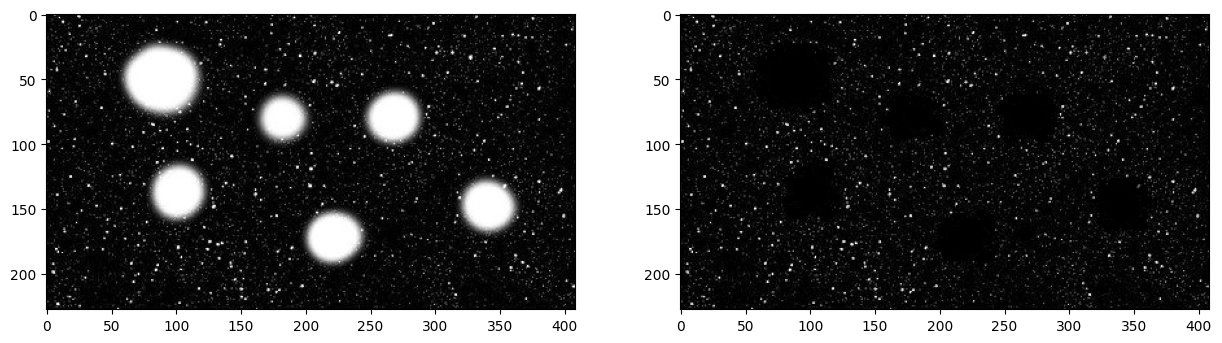

In [34]:
image = Image.open('wikiCosmo.png').convert("L")
image_array = np.array(image)
input_image = image_array
kernel = np.array((
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]), dtype="int")

output_image = cv2.morphologyEx(input_image, cv2.MORPH_TOPHAT, kernel)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(input_image,cmap = "gray")

ax[1].imshow(output_image,cmap = "gray")


## d) Hit & Miss

Este algoritmo tiene como fin la detección de patrones específicos en una imagen y marcarlos. Este algoritmo necesita como input una imagen binaria y devuelve el mismoo tipo de imagen.

Se podría establecer que es el algoritmo básico de imágenes binarias, ya que la mayoria de este tipo de algoritmos pueden ser derivados de este (Como vimos en el Thinning y Thickening)

A continuación se deja un breve ejemplo con una imagen de menos compleja que las anteriores, para poder observar con detalle el funcionamiento.

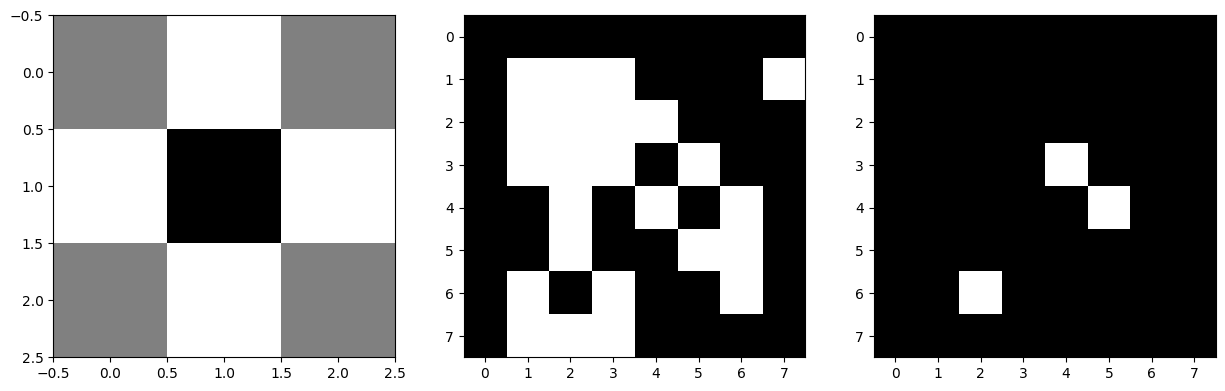

In [35]:
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 255, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 255, 0, 255, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")

kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel)


fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(kernel,cmap="gray")
ax[1].imshow(input_image,cmap="gray")
ax[2].imshow(output_image,cmap="gray")